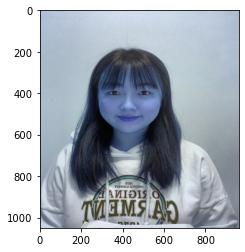

In [1]:
import cv2              #이미지 처리를 위해 opencv 읽기
import matplotlib.pyplot as plt         #이미지 출력을 위한 matplotlib 읽기
import numpy as np

#이미지 읽기
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat_self.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽기 (opencv는 bgr사용)
img_bgr = cv2.resize(img_bgr, (960, 1050))    # 이미지 크기 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 img_show함수에 넣기
plt.imshow(img_bgr) #bgr이라 이미지 색 변경 (r->b,b->r)
plt.show()

# 이미지 검출

rectangles[[(290, 320) (557, 587)]]


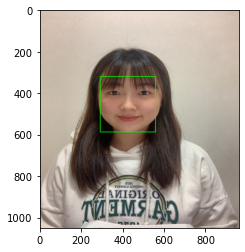

In [2]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #hog detector 선언

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #이미지 rgb로 불러오기
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 얼굴 랜드마크

68


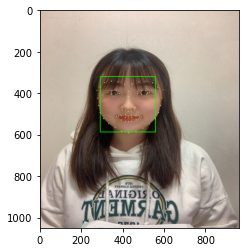

In [3]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)     #RGB 이미지를 입력받고 dlib.full_object_detection 반환
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))     # tuple (x,y) 68개로 이루어진 리스트 
    list_landmarks.append(list_points)    #68개의 랜드마크가 얼굴 개수만큼 저장된다.

print(len(list_landmarks[0]))      #랜드마크 갯수

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 스티커 붙이기

In [4]:
# 얼굴 좌표 확인하기
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 33
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width() 
    h = dlib_rect.width() 
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h)) 
    

(424, 467)
(x,y) : (424,333)
(w,h) : (268,268)


(268, 268, 3)


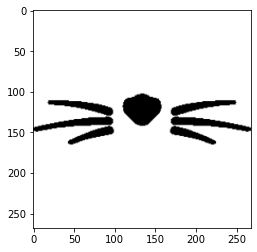

In [5]:
#이미지 적용하기
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)       # 코 스티커 w,h 로 resize 

plt.imshow(img_sticker)
plt.show()

In [21]:
#이미지 좌표 찾기
refined_x = x - w // 2  # left
refined_y = y      # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (290,333)


In [17]:
#안잘림


In [18]:
#잘리는 스티커 수정

#img_sticker = img_sticker[-refined_y:]
#print (img_sticker.shape)
#refined_y = 0
#print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

In [19]:
#원본 이미지에 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], 
                        refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], 
         refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

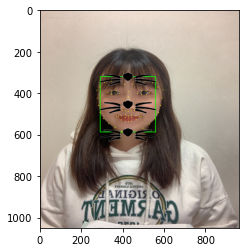

In [20]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()